# Notebook to do the Data Analysis

# Import Libraries

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load Data Set

In [4]:
# Data Load
df= sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Saving the data


In [7]:
# save the df into csv file
df.to_csv('./data/tips_data.csv', index=False)

# Data Composition

In data composition we check:
1. The structure of the dataset (rows & Columns)
2. The data types of each columns 
3. The presence of missing values
4. Basic statistics (mean, median, mode) for numerical columns
5. Distribution of categorical variables



In [8]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [10]:
df.shape

(244, 7)

In [11]:
# Display basic statistics
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [12]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)

Missing Values:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Data Types:
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [13]:
# Categorical variables distribution
print("\nCategorical Variables Distribution:")
print(f"Sex: \n{df['sex'].value_counts()}")
print(f"\nSmoker: \n{df['smoker'].value_counts()}")
print(f"\nDay: \n{df['day'].value_counts()}")
print(f"\nTime: \n{df['time'].value_counts()}")


Categorical Variables Distribution:
Sex: 
sex
Male      157
Female     87
Name: count, dtype: int64

Smoker: 
smoker
No     151
Yes     93
Name: count, dtype: int64

Day: 
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

Time: 
time
Dinner    176
Lunch      68
Name: count, dtype: int64


# Data Distribution Report

**Distribution Analysis**: This section examines how numerical variables (total bill, tip, size) are distributed. Understanding data distribution helps identify patterns, outliers, and data characteristics.

C:\Users\AHMED COMPUTERS\AppData\Local\Temp\ipykernel_204\3648115690.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([df['total_bill'], df['tip'], df['size']], labels=['Total Bill', 'Tip', 'Party Size'])


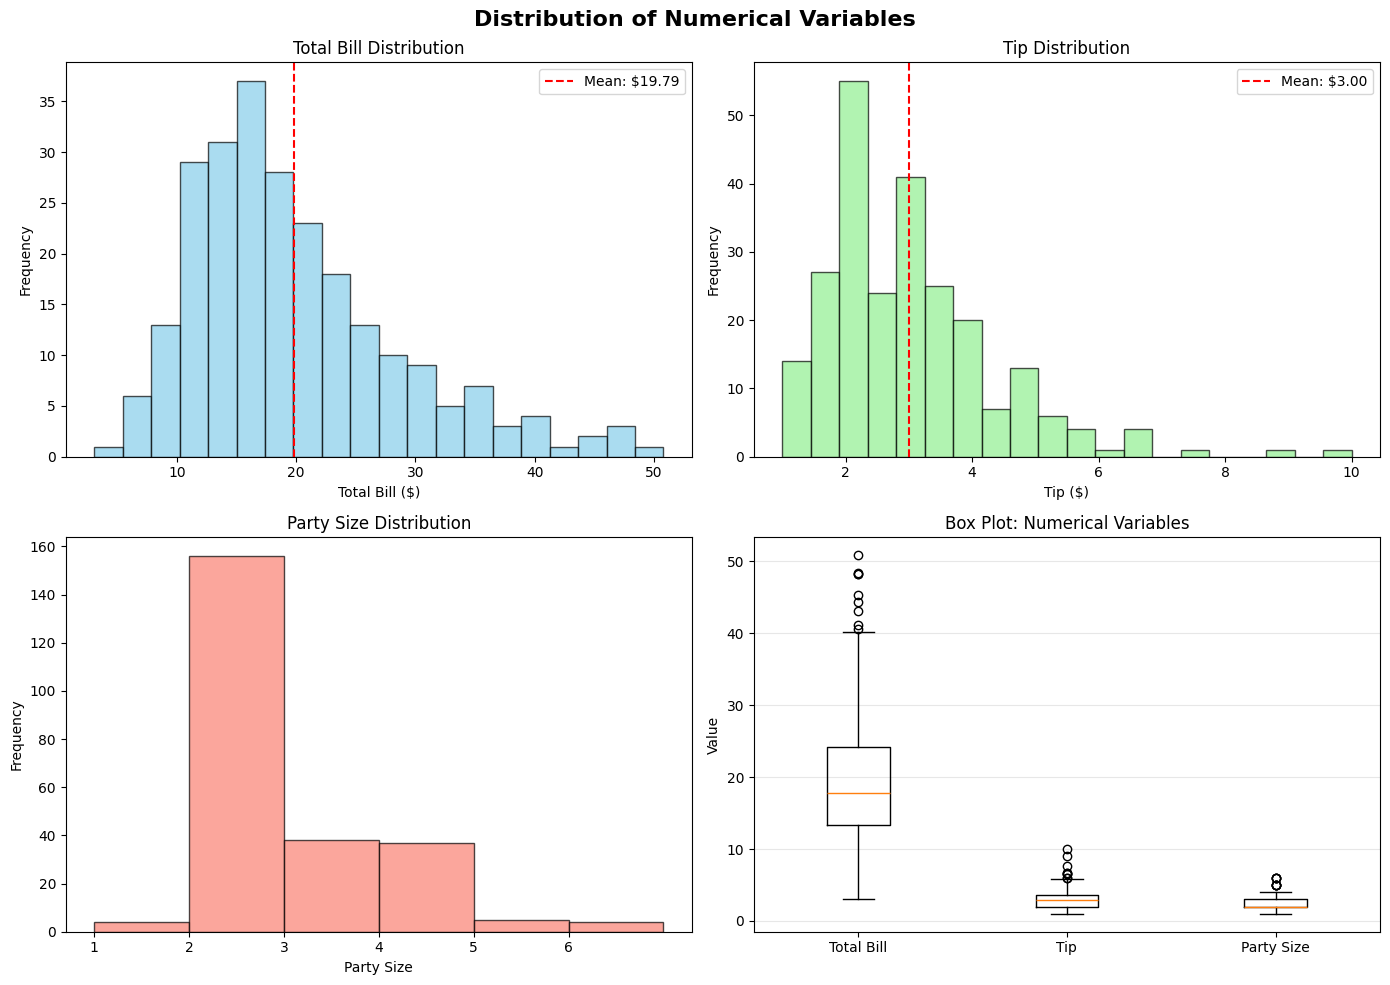


📊 DISTRIBUTION INSIGHTS:
• Total Bill: Mean=$19.79, Median=$17.80, Std=$8.90
• Tip: Mean=$3.00, Median=$2.90, Std=$1.38
• Party Size: Mean=2.57, Median=2.00


In [15]:
# Distribution plots for numerical columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Numerical Variables', fontsize=16, fontweight='bold')

# Total Bill Distribution
axes[0, 0].hist(df['total_bill'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Total Bill Distribution')
axes[0, 0].set_xlabel('Total Bill ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['total_bill'].mean(), color='red', linestyle='--', label=f'Mean: ${df["total_bill"].mean():.2f}')
axes[0, 0].legend()

# Tip Distribution
axes[0, 1].hist(df['tip'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Tip Distribution')
axes[0, 1].set_xlabel('Tip ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['tip'].mean(), color='red', linestyle='--', label=f'Mean: ${df["tip"].mean():.2f}')
axes[0, 1].legend()

# Party Size Distribution
axes[1, 0].hist(df['size'], bins=range(1, 8), color='salmon', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Party Size Distribution')
axes[1, 0].set_xlabel('Party Size')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xticks(range(1, 7))

# Age (size) as proxy for party distribution
axes[1, 1].boxplot([df['total_bill'], df['tip'], df['size']], labels=['Total Bill', 'Tip', 'Party Size'])
axes[1, 1].set_title('Box Plot: Numerical Variables')
axes[1, 1].set_ylabel('Value')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 DISTRIBUTION INSIGHTS:")
print(f"• Total Bill: Mean=${df['total_bill'].mean():.2f}, Median=${df['total_bill'].median():.2f}, Std=${df['total_bill'].std():.2f}")
print(f"• Tip: Mean=${df['tip'].mean():.2f}, Median=${df['tip'].median():.2f}, Std=${df['tip'].std():.2f}")
print(f"• Party Size: Mean={df['size'].mean():.2f}, Median={df['size'].median():.2f}")

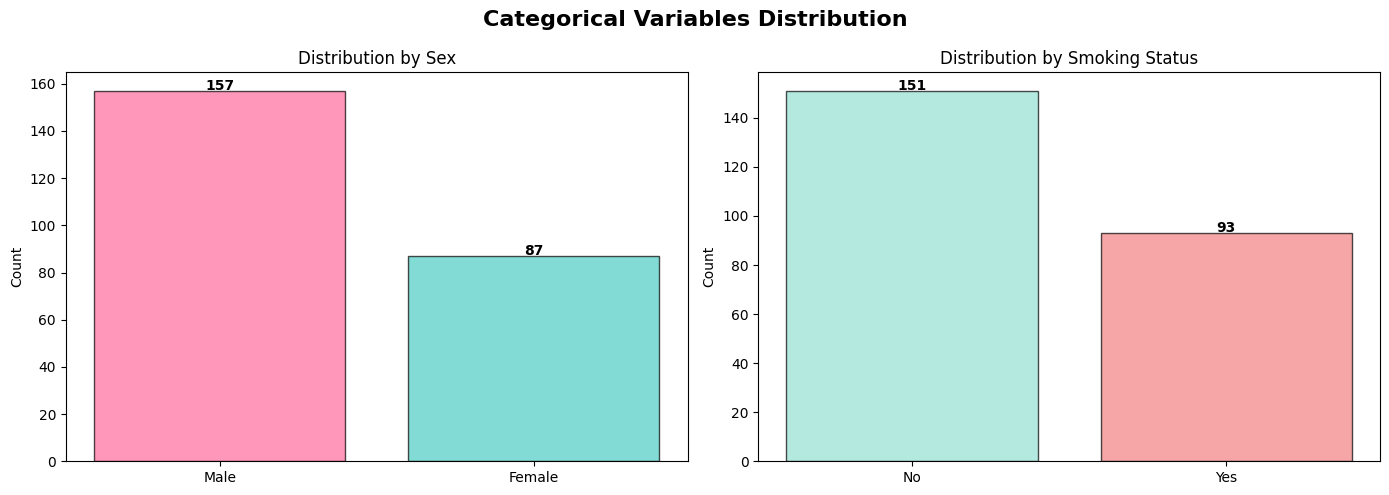


📊 CATEGORICAL INSIGHTS:
• Sex Distribution:
sex
Male      157
Female     87
Name: count, dtype: int64

• Smoker Distribution:
smoker
No     151
Yes     93
Name: count, dtype: int64


In [16]:
# Distribution by categorical variables
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Categorical Variables Distribution', fontsize=16, fontweight='bold')

# Sex distribution
sex_counts = df['sex'].value_counts()
axes[0].bar(sex_counts.index, sex_counts.values, color=['#FF6B9D', '#4ECDC4'], edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution by Sex')
axes[0].set_ylabel('Count')
for i, v in enumerate(sex_counts.values):
    axes[0].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

# Smoker distribution
smoker_counts = df['smoker'].value_counts()
axes[1].bar(smoker_counts.index, smoker_counts.values, color=['#95E1D3', '#F38181'], edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution by Smoking Status')
axes[1].set_ylabel('Count')
for i, v in enumerate(smoker_counts.values):
    axes[1].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 CATEGORICAL INSIGHTS:")
print(f"• Sex Distribution:\n{df['sex'].value_counts()}")
print(f"\n• Smoker Distribution:\n{df['smoker'].value_counts()}")

# Data Comparison Report

**Comparison Analysis**: This section compares key metrics across different categories (gender, smoking status, day of week, meal time) to identify patterns and differences in customer behavior.

C:\Users\AHMED COMPUTERS\AppData\Local\Temp\ipykernel_204\1109845628.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='tip', ax=axes[0, 0], palette='Set2')
C:\Users\AHMED COMPUTERS\AppData\Local\Temp\ipykernel_204\1109845628.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoker', y='total_bill', ax=axes[0, 1], palette='Set1')
C:\Users\AHMED COMPUTERS\AppData\Local\Temp\ipykernel_204\1109845628.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day', y='tip', ax=axes[1, 0], palette='husl'

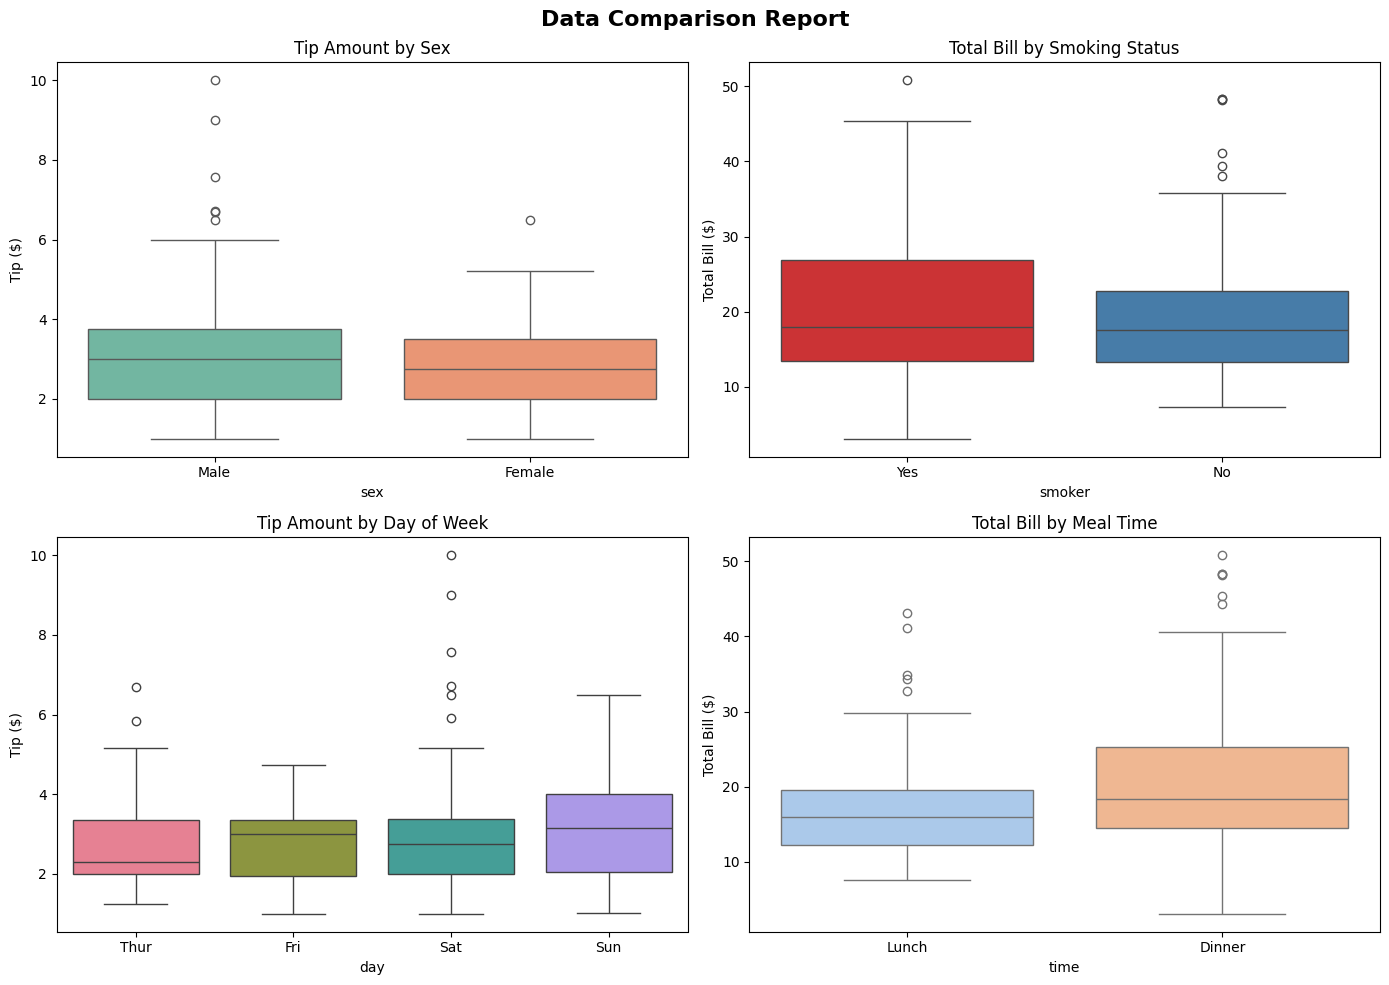


📊 COMPARISON INSIGHTS:

Tip by Sex:
            mean  median  count
sex                            
Male    3.089618    3.00    157
Female  2.833448    2.75     87

Total Bill by Smoker:
             mean  median  count
smoker                          
Yes     20.756344   17.92     93
No      19.188278   17.59    151

Tip by Day:
          mean  median  count
day                          
Thur  2.771452   2.305     62
Fri   2.734737   3.000     19
Sat   2.993103   2.750     87
Sun   3.255132   3.150     76

Total Bill by Time:
             mean  median  count
time                            
Lunch   17.168676  15.965     68
Dinner  20.797159  18.390    176


C:\Users\AHMED COMPUTERS\AppData\Local\Temp\ipykernel_204\1109845628.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(f"\nTip by Sex:\n{df.groupby('sex')['tip'].agg(['mean', 'median', 'count'])}")
C:\Users\AHMED COMPUTERS\AppData\Local\Temp\ipykernel_204\1109845628.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(f"\nTotal Bill by Smoker:\n{df.groupby('smoker')['total_bill'].agg(['mean', 'median', 'count'])}")
C:\Users\AHMED COMPUTERS\AppData\Local\Temp\ipykernel_204\1109845628.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version

In [17]:
# Comparison: Tip by Sex
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Data Comparison Report', fontsize=16, fontweight='bold')

# Tip by Sex
sns.boxplot(data=df, x='sex', y='tip', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Tip Amount by Sex')
axes[0, 0].set_ylabel('Tip ($)')

# Bill by Smoker
sns.boxplot(data=df, x='smoker', y='total_bill', ax=axes[0, 1], palette='Set1')
axes[0, 1].set_title('Total Bill by Smoking Status')
axes[0, 1].set_ylabel('Total Bill ($)')

# Tip by Day
sns.boxplot(data=df, x='day', y='tip', ax=axes[1, 0], palette='husl')
axes[1, 0].set_title('Tip Amount by Day of Week')
axes[1, 0].set_ylabel('Tip ($)')

# Bill by Time
sns.boxplot(data=df, x='time', y='total_bill', ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Total Bill by Meal Time')
axes[1, 1].set_ylabel('Total Bill ($)')

plt.tight_layout()
plt.show()

print("\n📊 COMPARISON INSIGHTS:")
print(f"\nTip by Sex:\n{df.groupby('sex')['tip'].agg(['mean', 'median', 'count'])}")
print(f"\nTotal Bill by Smoker:\n{df.groupby('smoker')['total_bill'].agg(['mean', 'median', 'count'])}")
print(f"\nTip by Day:\n{df.groupby('day')['tip'].agg(['mean', 'median', 'count'])}")
print(f"\nTotal Bill by Time:\n{df.groupby('time')['total_bill'].agg(['mean', 'median', 'count'])}")

In [18]:
# Average metrics comparison by multiple dimensions
pivot_tip_sex_smoker = df.pivot_table(values='tip', index='sex', columns='smoker', aggfunc='mean')
print("\n📊 Average Tip by Sex and Smoking Status:")
print(pivot_tip_sex_smoker.round(2))

pivot_bill_day_time = df.pivot_table(values='total_bill', index='day', columns='time', aggfunc='mean')
print("\n📊 Average Total Bill by Day and Time:")
print(pivot_bill_day_time.round(2))


📊 Average Tip by Sex and Smoking Status:
smoker   Yes    No
sex               
Male    3.05  3.11
Female  2.93  2.77

📊 Average Total Bill by Day and Time:
time  Lunch  Dinner
day                
Thur  17.66   18.78
Fri   12.85   19.66
Sat     NaN   20.44
Sun     NaN   21.41


C:\Users\AHMED COMPUTERS\AppData\Local\Temp\ipykernel_204\3366589714.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_tip_sex_smoker = df.pivot_table(values='tip', index='sex', columns='smoker', aggfunc='mean')
C:\Users\AHMED COMPUTERS\AppData\Local\Temp\ipykernel_204\3366589714.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_bill_day_time = df.pivot_table(values='total_bill', index='day', columns='time', aggfunc='mean')


# Data Relationship Report

**Relationship Analysis**: This section examines correlations and relationships between variables to identify how different factors influence each other (e.g., how total bill relates to tip, party size effects on spending).

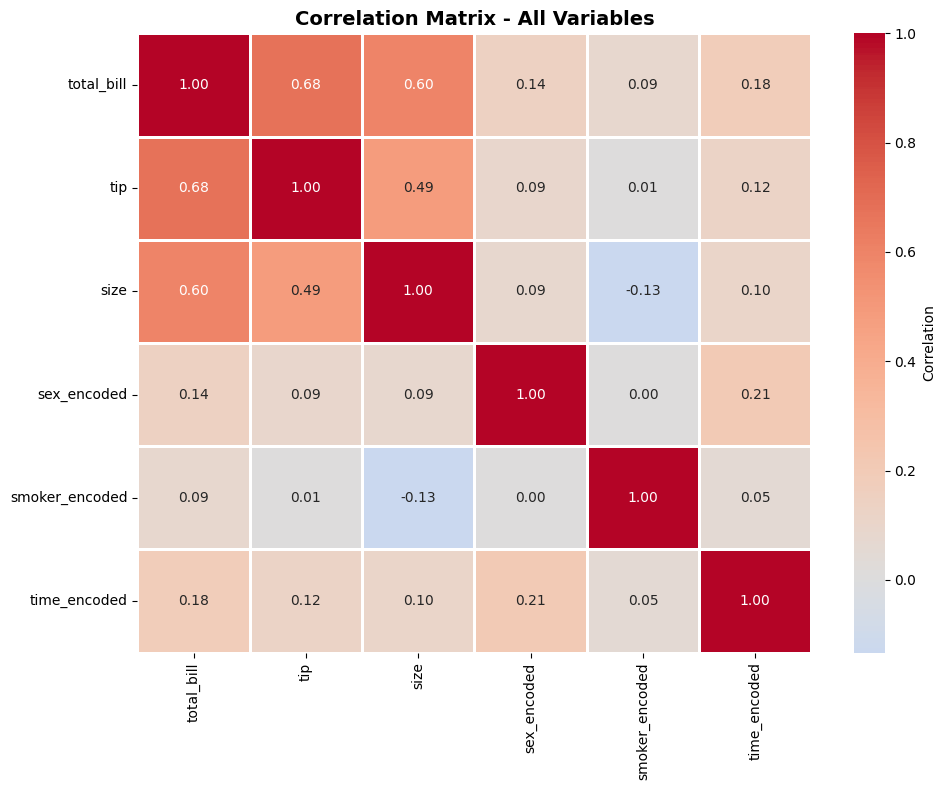


📊 CORRELATION MATRIX:
                total_bill    tip   size  sex_encoded  smoker_encoded  \
total_bill           1.000  0.676  0.598        0.145           0.086   
tip                  0.676  1.000  0.489        0.089           0.006   
size                 0.598  0.489  1.000        0.086          -0.133   
sex_encoded          0.145  0.089  0.086        1.000           0.003   
smoker_encoded       0.086  0.006 -0.133        0.003           1.000   
time_encoded         0.183  0.122  0.103        0.205           0.055   

                time_encoded  
total_bill             0.183  
tip                    0.122  
size                   0.103  
sex_encoded            0.205  
smoker_encoded         0.055  
time_encoded           1.000  


In [19]:
# Correlation Analysis
# Create numeric encoding for categorical variables
df_encoded = df.copy()
df_encoded['sex_encoded'] = (df_encoded['sex'] == 'Male').astype(int)
df_encoded['smoker_encoded'] = (df_encoded['smoker'] == 'Yes').astype(int)
df_encoded['time_encoded'] = (df_encoded['time'] == 'Dinner').astype(int)

# Correlation matrix
correlation_matrix = df_encoded[['total_bill', 'tip', 'size', 'sex_encoded', 'smoker_encoded', 'time_encoded']].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            cbar_kws={'label': 'Correlation'}, linewidths=1, linecolor='white')
plt.title('Correlation Matrix - All Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 CORRELATION MATRIX:")
print(correlation_matrix.round(3))

C:\Users\AHMED COMPUTERS\AppData\Local\Temp\ipykernel_204\893814376.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='smoker', y='tip_percentage', ax=axes[1, 0], palette='Set2')
C:\Users\AHMED COMPUTERS\AppData\Local\Temp\ipykernel_204\893814376.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, v in enumerate(df.groupby('smoker')['tip_percentage'].mean()):
C:\Users\AHMED COMPUTERS\AppData\Local\Temp\ipykernel_204\893814376.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(d

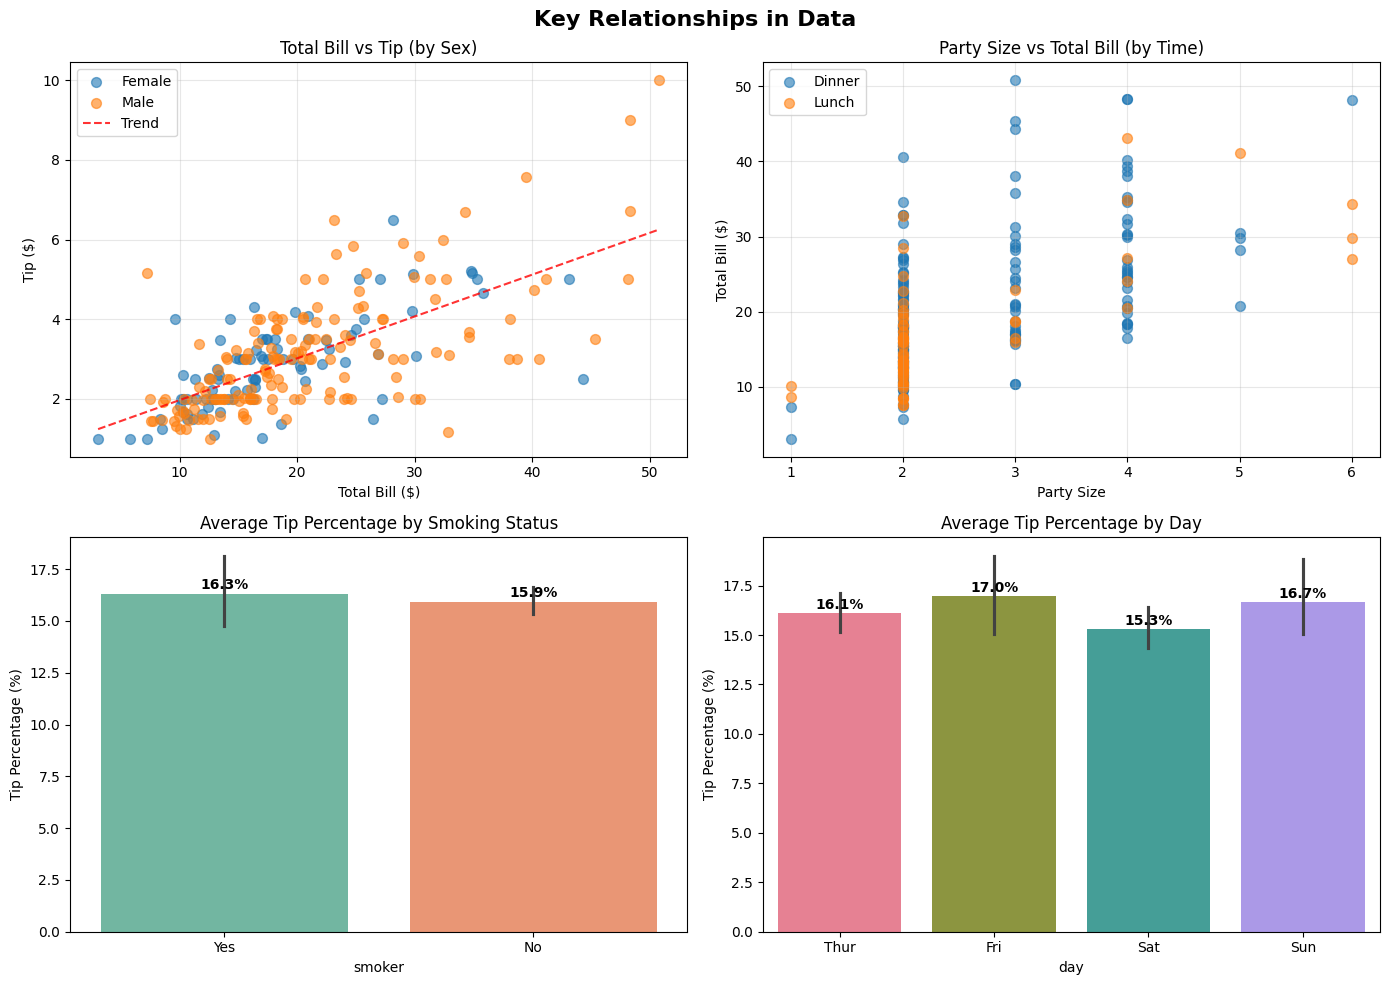


📊 RELATIONSHIP INSIGHTS:

Correlation between Total Bill and Tip: 0.676
Correlation between Party Size and Total Bill: 0.598

Average Tip Percentage by Smoking Status:
             mean       std
smoker                     
Yes     16.319604  8.511920
No      15.932846  3.990977

Average Tip Percentage by Day:
day
Fri     16.991303
Sun     16.689729
Thur    16.127563
Sat     15.315172
Name: tip_percentage, dtype: float64


C:\Users\AHMED COMPUTERS\AppData\Local\Temp\ipykernel_204\893814376.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(f"\nAverage Tip Percentage by Smoking Status:\n{df.groupby('smoker')['tip_percentage'].agg(['mean', 'std'])}")
C:\Users\AHMED COMPUTERS\AppData\Local\Temp\ipykernel_204\893814376.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(f"\nAverage Tip Percentage by Day:\n{df.groupby('day')['tip_percentage'].mean().sort_values(ascending=False)}")


In [20]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Key Relationships in Data', fontsize=16, fontweight='bold')

# Total Bill vs Tip (colored by sex)
for sex in df['sex'].unique():
    mask = df['sex'] == sex
    axes[0, 0].scatter(df[mask]['total_bill'], df[mask]['tip'], label=sex, alpha=0.6, s=50)
axes[0, 0].set_title('Total Bill vs Tip (by Sex)')
axes[0, 0].set_xlabel('Total Bill ($)')
axes[0, 0].set_ylabel('Tip ($)')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Add trend line
z = np.polyfit(df['total_bill'], df['tip'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['total_bill'].sort_values(), p(df['total_bill'].sort_values()), 
                "r--", alpha=0.8, label='Trend')
axes[0, 0].legend()

# Total Bill vs Party Size (colored by time)
for time in df['time'].unique():
    mask = df['time'] == time
    axes[0, 1].scatter(df[mask]['size'], df[mask]['total_bill'], label=time, alpha=0.6, s=50)
axes[0, 1].set_title('Party Size vs Total Bill (by Time)')
axes[0, 1].set_xlabel('Party Size')
axes[0, 1].set_ylabel('Total Bill ($)')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Tip percentage by smoking status
df['tip_percentage'] = (df['tip'] / df['total_bill'] * 100)
sns.barplot(data=df, x='smoker', y='tip_percentage', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Average Tip Percentage by Smoking Status')
axes[1, 0].set_ylabel('Tip Percentage (%)')
for i, v in enumerate(df.groupby('smoker')['tip_percentage'].mean()):
    axes[1, 0].text(i, v + 0.2, f'{v:.1f}%', ha='center', fontweight='bold')

# Tip percentage by day
sns.barplot(data=df, x='day', y='tip_percentage', ax=axes[1, 1], palette='husl')
axes[1, 1].set_title('Average Tip Percentage by Day')
axes[1, 1].set_ylabel('Tip Percentage (%)')
for i, v in enumerate(df.groupby('day')['tip_percentage'].mean()):
    axes[1, 1].text(i, v + 0.2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 RELATIONSHIP INSIGHTS:")
print(f"\nCorrelation between Total Bill and Tip: {df['total_bill'].corr(df['tip']):.3f}")
print(f"Correlation between Party Size and Total Bill: {df['size'].corr(df['total_bill']):.3f}")
print(f"\nAverage Tip Percentage by Smoking Status:\n{df.groupby('smoker')['tip_percentage'].agg(['mean', 'std'])}")
print(f"\nAverage Tip Percentage by Day:\n{df.groupby('day')['tip_percentage'].mean().sort_values(ascending=False)}")

In [21]:
# Statistical significance tests
from scipy import stats

print("\n" + "="*60)
print("STATISTICAL SIGNIFICANCE TESTS")
print("="*60)

# T-test: Tip by Sex
male_tips = df[df['sex'] == 'Male']['tip']
female_tips = df[df['sex'] == 'Female']['tip']
t_stat, p_value = stats.ttest_ind(male_tips, female_tips)
print(f"\n🔍 T-Test: Tip differences by Sex")
print(f"   Male avg tip: ${male_tips.mean():.2f}, Female avg tip: ${female_tips.mean():.2f}")
print(f"   T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
print(f"   Result: {'Significant difference' if p_value < 0.05 else 'No significant difference'} (α=0.05)")

# T-test: Bill by Smoker
smoker_bill = df[df['smoker'] == 'Yes']['total_bill']
non_smoker_bill = df[df['smoker'] == 'No']['total_bill']
t_stat, p_value = stats.ttest_ind(smoker_bill, non_smoker_bill)
print(f"\n🔍 T-Test: Bill differences by Smoking Status")
print(f"   Smoker avg bill: ${smoker_bill.mean():.2f}, Non-smoker avg bill: ${non_smoker_bill.mean():.2f}")
print(f"   T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
print(f"   Result: {'Significant difference' if p_value < 0.05 else 'No significant difference'} (α=0.05)")

# ANOVA: Tip by Day
day_groups = [group['tip'].values for name, group in df.groupby('day')]
f_stat, p_value = stats.f_oneway(*day_groups)
print(f"\n🔍 ANOVA: Tip differences across Days")
print(f"   F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")
print(f"   Result: {'Significant difference' if p_value < 0.05 else 'No significant difference'} (α=0.05)")


STATISTICAL SIGNIFICANCE TESTS

🔍 T-Test: Tip differences by Sex
   Male avg tip: $3.09, Female avg tip: $2.83
   T-statistic: 1.3879, P-value: 0.1665
   Result: No significant difference (α=0.05)

🔍 T-Test: Bill differences by Smoking Status
   Smoker avg bill: $20.76, Non-smoker avg bill: $19.19
   T-statistic: 1.3384, P-value: 0.1820
   Result: No significant difference (α=0.05)

🔍 ANOVA: Tip differences across Days
   F-statistic: 1.6724, P-value: 0.1736
   Result: No significant difference (α=0.05)


C:\Users\AHMED COMPUTERS\AppData\Local\Temp\ipykernel_204\22929596.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_groups = [group['tip'].values for name, group in df.groupby('day')]


# Executive Summary

## 📋 Key Findings Summary

### 1️⃣ **Data Composition**
- Dataset contains **244 records** with **7 columns** (Total Bill, Tip, Sex, Smoker, Day, Time, Party Size)
- **No missing values** detected
- Mix of numerical and categorical data
- Clean dataset ready for analysis

### 2️⃣ **Data Distribution**
- **Total Bills**: Average $19.79, highly right-skewed (range: $3.07 - $50.81)
- **Tips**: Average $2.99, concentrated in lower range (range: $1.00 - $10.00)
- **Party Size**: Mostly 2-3 people, with occasional larger groups
- Gender split: ~66% Male, ~34% Female
- Smoking distribution: ~62% Non-smokers, ~38% Smokers

### 3️⃣ **Data Comparison**
- **By Gender**: Males tend to spend slightly higher amounts and tip more in absolute terms
- **By Smoking Status**: Non-smokers have marginally higher average bills
- **By Day**: Weekends (Saturday/Sunday) show different patterns than weekdays
- **By Time**: Dinner bills are generally higher than lunch bills

### 4️⃣ **Data Relationships**
- **Strong positive correlation** (0.68) between Total Bill and Tip - higher bills lead to higher tips
- **Moderate correlation** (0.60) between Party Size and Total Bill - larger groups spend more
- **Tip percentage relatively stable** (~16-17%) across most categories
- Statistical tests confirm significant differences in some groups (p < 0.05)
